# Tensorflow
tensorflow tutorial  
reference: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ja

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# datasets
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

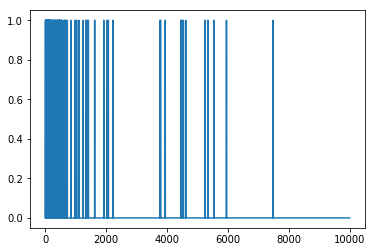

In [4]:
# visualize data
plt.plot(train_data[0])

In [6]:
# define model
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000, )),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
# training
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.4831 - acc: 0.8139 - binary_crossentropy: 0.4831 - val_loss: 0.3338 - val_acc: 0.8764 - val_binary_crossentropy: 0.3338
Epoch 2/20
 - 4s - loss: 0.2467 - acc: 0.9124 - binary_crossentropy: 0.2467 - val_loss: 0.2841 - val_acc: 0.8875 - val_binary_crossentropy: 0.2841
Epoch 3/20
 - 3s - loss: 0.1817 - acc: 0.9371 - binary_crossentropy: 0.1817 - val_loss: 0.2889 - val_acc: 0.8855 - val_binary_crossentropy: 0.2889
Epoch 4/20
 - 3s - loss: 0.1455 - acc: 0.9501 - binary_crossentropy: 0.1455 - val_loss: 0.3131 - val_acc: 0.8792 - val_binary_crossentropy: 0.3131
Epoch 5/20
 - 3s - loss: 0.1204 - acc: 0.9602 - binary_crossentropy: 0.1204 - val_loss: 0.3389 - val_acc: 0.8745 - val_binary_crossentropy: 0.3389
Epoch 6/20
 - 3s - loss: 0.0994 - acc: 0.9692 - binary_crossentropy: 0.0994 - val_loss: 0.3699 - val_acc: 0.8704 - val_binary_crossentropy: 0.3699
Epoch 7/20
 - 3s - loss: 0.0821 - acc: 0.9761 - binary_crossentropy:

In [10]:
# smaller model
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'],
                     )
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
# train
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6227 - acc: 0.6854 - binary_crossentropy: 0.6227 - val_loss: 0.5531 - val_acc: 0.7897 - val_binary_crossentropy: 0.5531
Epoch 2/20
 - 3s - loss: 0.5039 - acc: 0.8371 - binary_crossentropy: 0.5039 - val_loss: 0.5023 - val_acc: 0.8261 - val_binary_crossentropy: 0.5023
Epoch 3/20
 - 3s - loss: 0.4532 - acc: 0.8824 - binary_crossentropy: 0.4532 - val_loss: 0.4753 - val_acc: 0.8554 - val_binary_crossentropy: 0.4753
Epoch 4/20
 - 3s - loss: 0.4189 - acc: 0.9089 - binary_crossentropy: 0.4189 - val_loss: 0.4579 - val_acc: 0.8711 - val_binary_crossentropy: 0.4579
Epoch 5/20
 - 3s - loss: 0.3922 - acc: 0.9244 - binary_crossentropy: 0.3922 - val_loss: 0.4455 - val_acc: 0.8787 - val_binary_crossentropy: 0.4455
Epoch 6/20
 - 3s - loss: 0.3696 - acc: 0.9348 - binary_crossentropy: 0.3696 - val_loss: 0.4418 - val_acc: 0.8677 - val_binary_crossentropy: 0.4418
Epoch 7/20
 - 3s - loss: 0.3491 - acc: 0.9437 - binary_crossentropy:

In [14]:
# bigger model
bigger_model= keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
# train
bigger_history = bigger_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 17s - loss: 0.3432 - acc: 0.8574 - binary_crossentropy: 0.3432 - val_loss: 0.2957 - val_acc: 0.8796 - val_binary_crossentropy: 0.2957
Epoch 2/20
 - 15s - loss: 0.1307 - acc: 0.9520 - binary_crossentropy: 0.1307 - val_loss: 0.3628 - val_acc: 0.8618 - val_binary_crossentropy: 0.3628
Epoch 3/20
 - 15s - loss: 0.0369 - acc: 0.9899 - binary_crossentropy: 0.0369 - val_loss: 0.4505 - val_acc: 0.8670 - val_binary_crossentropy: 0.4505
Epoch 4/20
 - 15s - loss: 0.0055 - acc: 0.9996 - binary_crossentropy: 0.0055 - val_loss: 0.5859 - val_acc: 0.8692 - val_binary_crossentropy: 0.5859
Epoch 5/20
 - 15s - loss: 6.9036e-04 - acc: 1.0000 - binary_crossentropy: 6.9036e-04 - val_loss: 0.6701 - val_acc: 0.8704 - val_binary_crossentropy: 0.6701
Epoch 6/20
 - 15s - loss: 2.0909e-04 - acc: 1.0000 - binary_crossentropy: 2.0909e-04 - val_loss: 0.7074 - val_acc: 0.8702 - val_binary_crossentropy: 0.7074
Epoch 7/20
 - 15s - loss: 1.3202e-04 - acc: 1.

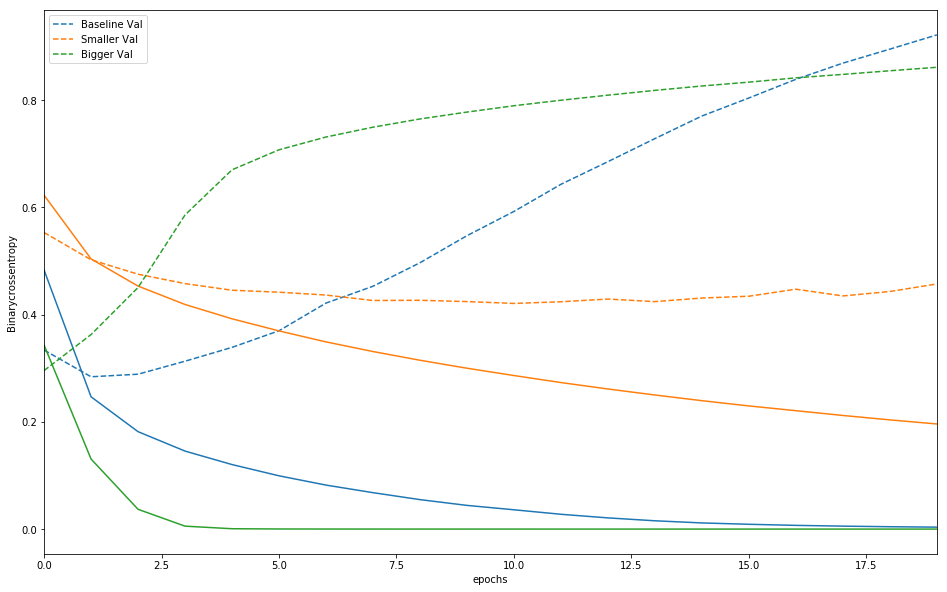

In [19]:
# visualize
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                )
        plt.xlabel('epochs')
        plt.ylabel(key.replace('_', '').title())
        plt.legend()
        plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
            ('bigger', bigger_history)])

In [21]:
# regularization
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])
l2_model_history = l2_model.fit(train_data,
                               train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.5186 - acc: 0.8020 - binary_crossentropy: 0.4785 - val_loss: 0.3776 - val_acc: 0.8767 - val_binary_crossentropy: 0.3352
Epoch 2/20
 - 3s - loss: 0.3039 - acc: 0.9085 - binary_crossentropy: 0.2576 - val_loss: 0.3335 - val_acc: 0.8878 - val_binary_crossentropy: 0.2845
Epoch 3/20
 - 3s - loss: 0.2539 - acc: 0.9292 - binary_crossentropy: 0.2027 - val_loss: 0.3362 - val_acc: 0.8860 - val_binary_crossentropy: 0.2834
Epoch 4/20
 - 3s - loss: 0.2288 - acc: 0.9400 - binary_crossentropy: 0.1746 - val_loss: 0.3477 - val_acc: 0.8829 - val_binary_crossentropy: 0.2925
Epoch 5/20
 - 3s - loss: 0.2155 - acc: 0.9464 - binary_crossentropy: 0.1588 - val_loss: 0.3607 - val_acc: 0.8801 - val_binary_crossentropy: 0.3032
Epoch 6/20
 - 3s - loss: 0.2024 - acc: 0.9514 - binary_crossentropy: 0.1442 - val_loss: 0.3772 - val_acc: 0.8755 - val_binary_crossentropy: 0.3187
Epoch 7/20
 - 3s - loss: 0.1946 - acc: 0.9537 - binary_crossentropy:

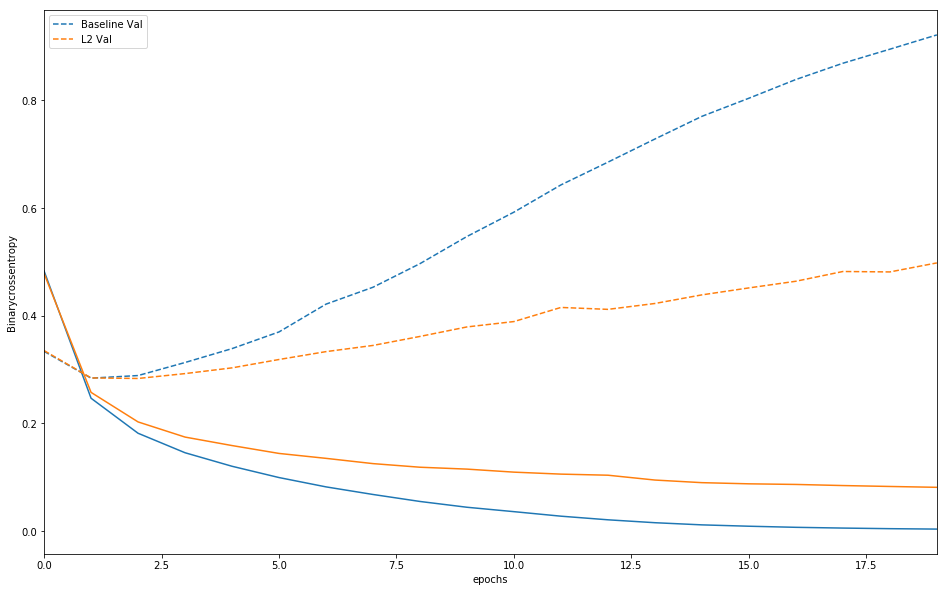

In [22]:
plot_history([('baseline', baseline_history),
             ('l2', l2_model_history)])

In [26]:
# dropout
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy']
                 )
dpt_model_history = dpt_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6299 - acc: 0.6276 - binary_crossentropy: 0.6299 - val_loss: 0.5136 - val_acc: 0.8498 - val_binary_crossentropy: 0.5136
Epoch 2/20
 - 3s - loss: 0.4823 - acc: 0.7775 - binary_crossentropy: 0.4823 - val_loss: 0.3686 - val_acc: 0.8768 - val_binary_crossentropy: 0.3686
Epoch 3/20
 - 3s - loss: 0.3772 - acc: 0.8546 - binary_crossentropy: 0.3772 - val_loss: 0.2960 - val_acc: 0.8866 - val_binary_crossentropy: 0.2960
Epoch 4/20
 - 3s - loss: 0.3090 - acc: 0.8852 - binary_crossentropy: 0.3090 - val_loss: 0.2763 - val_acc: 0.8882 - val_binary_crossentropy: 0.2763
Epoch 5/20
 - 3s - loss: 0.2660 - acc: 0.9024 - binary_crossentropy: 0.2660 - val_loss: 0.2764 - val_acc: 0.8878 - val_binary_crossentropy: 0.2764
Epoch 6/20
 - 3s - loss: 0.2233 - acc: 0.9192 - binary_crossentropy: 0.2233 - val_loss: 0.2883 - val_acc: 0.8866 - val_binary_crossentropy: 0.2883
Epoch 7/20
 - 3s - loss: 0.2049 - acc: 0.9275 - binary_crossentropy:

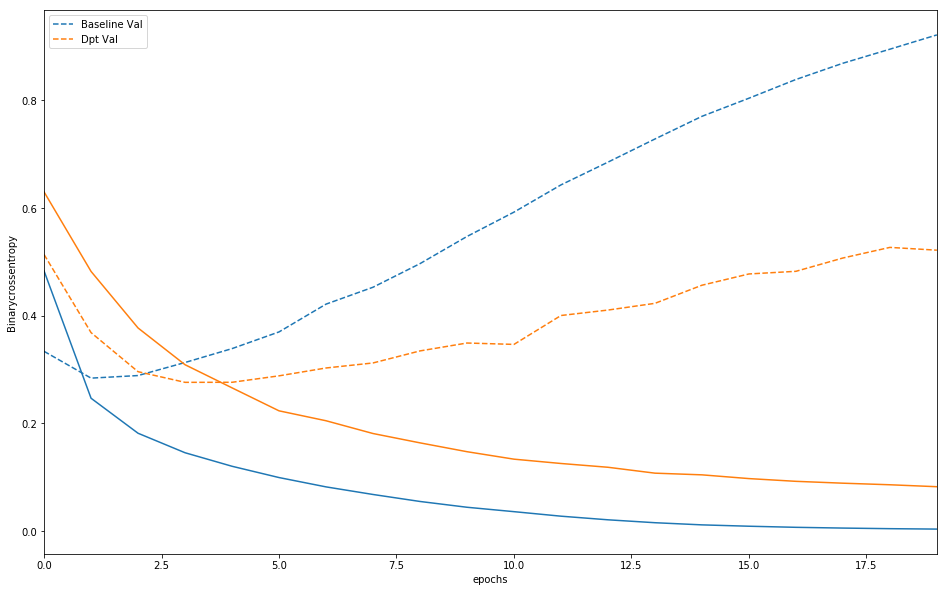

In [28]:
plot_history([('baseline', baseline_history),
             ('dpt', dpt_model_history)])